# Outlier Detection by DBSCAN

We learned that DBSCAN is a density based clustering method based on the connectivities of data points. By setting the epsilon and min_point, we cand detect the data points that are isolated by majority of data points.

## Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data in

In [ ]:
df = pd.read_csv('/work/Nov2Temp.csv')
df

,high,low
0,58,25
1,26,11
2,53,24
3,60,37
4,67,42
...,...,...
115,99,33
116,99,27
117,18,38
118,15,51


## Deal with missing values

In [ ]:
df[df['high'] < -100]

,high,low
72,-998,-998
79,-998,-998


In [ ]:
df.drop([72, 79], inplace = True)
df

,high,low
0,58,25
1,26,11
2,53,24
3,60,37
4,67,42
...,...,...
115,99,33
116,99,27
117,18,38
118,15,51


## Conducting DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
X = StandardScaler().fit_transform(df)
X

array([[ 0.11564569, -0.50507808],
       [-1.99391045, -1.46968963],
       [-0.21397246, -0.57397891],
       [ 0.24749295,  0.32173182],
       [ 0.70895835,  0.66623594],
       [ 0.90672924,  0.32173182],
       [ 0.77488198,  0.59733512],
       [ 0.77488198,  0.11502934],
       [ 0.84080561,  0.73513677],
       [ 0.04972206,  0.04612852],
       [-0.41174334, -0.98738385],
       [ 0.70895835, -0.29837561],
       [-0.27989609, -0.29837561],
       [-0.21397246, -0.22947478],
       [ 1.10450013,  0.45953347],
       [ 0.18156932, -0.02277231],
       [-0.14804883, -0.29837561],
       [ 0.11564569, -0.29837561],
       [-1.53244504, -1.4007888 ],
       [-0.21397246, -0.98738385],
       [ 0.90672924,  0.11502934],
       [ 1.5000419 ,  0.52843429],
       [ 0.37934021, -0.22947478],
       [-0.01620157, -0.22947478],
       [ 0.24749295,  0.25283099],
       [-2.38945222, -1.19408633],
       [-0.93913238, -1.4007888 ],
       [-0.41174334, -0.16057396],
       [-1.00505601,

Estimated number of clusters: 1
Estimated number of noise points: 3


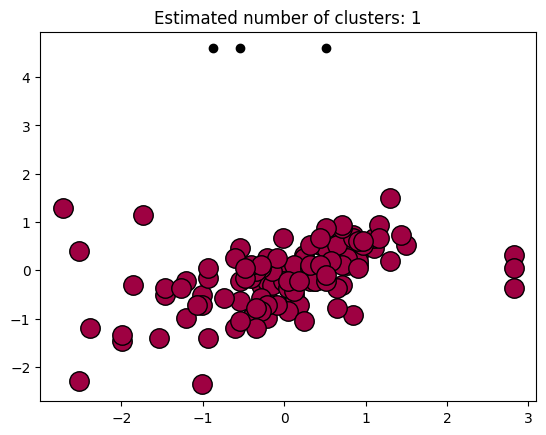

In [ ]:
db = DBSCAN(eps = 1.5, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

DBSCAN by Di Wu is licensed under [CC BY NC SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/).